In [2]:
# Figure 1.3
import numpy as np
import matplotlib.pyplot as plt
import os

import seaborn as sns;
# seaborn: ggplot in python, a brief introduction: https://seaborn.pydata.org/introduction.html
sns.set(style="ticks", color_codes=True)

import pandas as pd
pd.set_option('precision', 2) # 2 decimal places
pd.set_option('display.max_rows', 20) # the maximum number of rows and columns displayed when a frame is pretty-printed
# pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 30)
# pd.set_option("display.min_rows", 15)
pd.set_option('display.width', 100) # wide windows
# For more information about set_option, please visit: https://pandas.pydata.org/docs/user_guide/options.html

import sklearn
from sklearn.datasets import load_iris
iris = load_iris()

# Extract numpy arrays
X = iris.data 
y = iris.target

# Convert to pandas dataframe 
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['label'] = pd.Series(iris.target_names[y], dtype='category')

In [3]:
isinstance(df, pd.DataFrame)

True

In [4]:
# See what df is:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


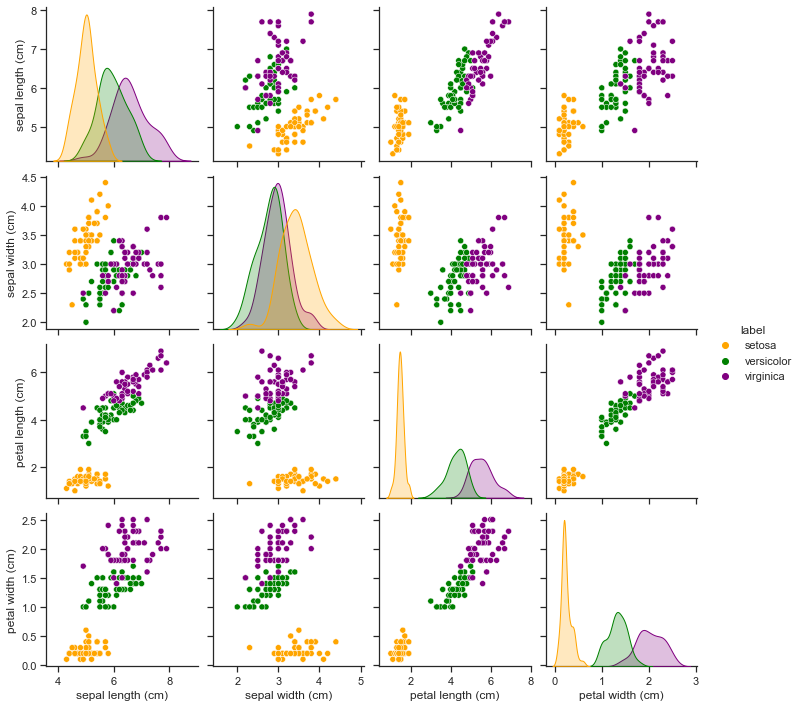

In [5]:
palette = {'setosa': 'orange', 'versicolor': 'green', 'virginica': 'purple'}

g = sns.pairplot(df, vars = df.columns[0:4], hue="label", palette=palette)
# plt.savefig("../figures/iris_scatterplot_purple.pdf") # Save figure
# plt.show()

In [6]:
df.columns[0:4]

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')

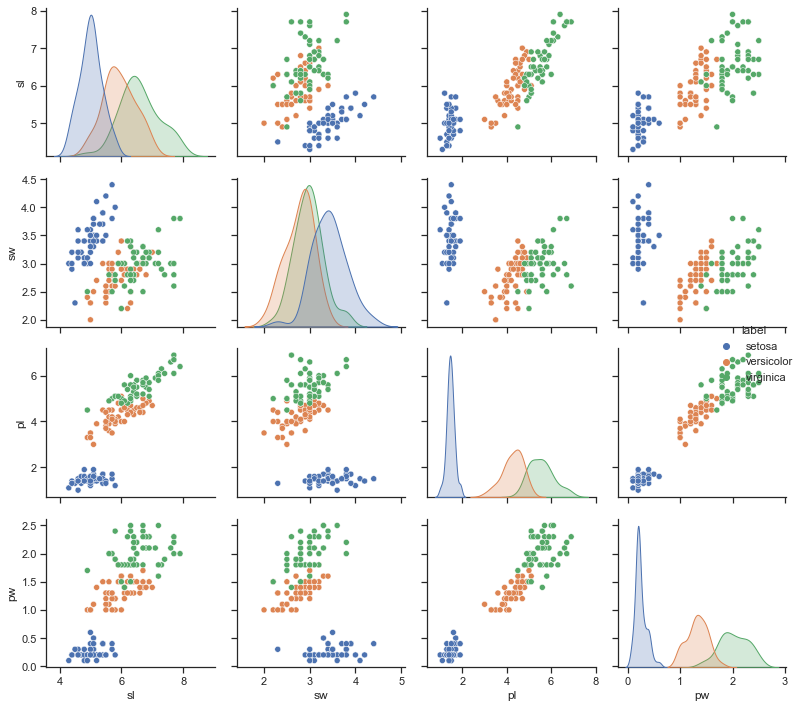

In [7]:
# Change column names
iris_df = df.copy()
iris_df.columns =  ['sl', 'sw', 'pl', 'pw'] + ['label'] 

g = sns.pairplot(iris_df, vars = iris_df.columns[0:4], hue="label")
plt.tight_layout()
# plt.savefig("../figures/iris_pairplot.pdf") # Save figure
plt.show()

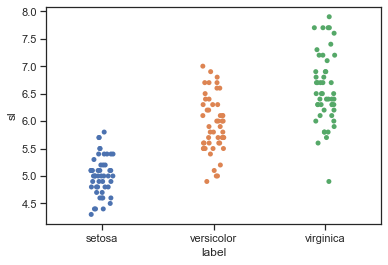

In [8]:
sns.stripplot(x="label", y="sl", data=iris_df, jitter=True)
# plt.savefig('../figures/iris_sepal_length_strip_plot.pdf', dpi=300) # Save figure
plt.show()

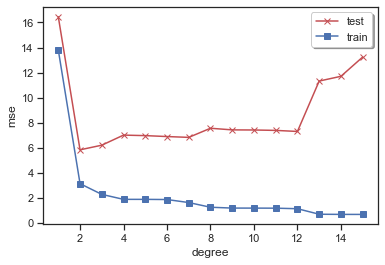

In [9]:
# Figure 1.8

# Plot polynomial regression on 1d problem
# Based on https://github.com/probml/pmtk3/blob/master/demos/linregPolyVsDegree.m

import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler 
import sklearn.metrics 
from sklearn.metrics import mean_squared_error as mse

figdir = "../figures"
def save_fig(fname):
    if figdir: plt.savefig(os.path.join(figdir, fname))
    
def make_1dregression_data(n=21): # n is the size of training set
    np.random.seed(0)
    xtrain = np.linspace(0.0, 20, n)
    xtest = np.arange(0.0, 20, 0.1)
    sigma2 = 4
    w = np.array([-1.5, 1/9.])
    fun = lambda x: w[0]*x + w[1]*np.square(x)
    ytrain = fun(xtrain) + np.random.normal(0, 1, xtrain.shape) * \
        np.sqrt(sigma2)
    ytest= fun(xtest) + np.random.normal(0, 1, xtest.shape) * \
        np.sqrt(sigma2)
    return xtrain, ytrain, xtest, ytest

xtrain, ytrain, xtest, ytest = make_1dregression_data(n=21)

#Rescaling data
scaler = MinMaxScaler(feature_range=(-1, 1)) # desired range after transformation
Xtrain = scaler.fit_transform(xtrain.reshape(-1, 1)) # fit to data, and then transform to it
Xtest = scaler.transform(xtest.reshape(-1, 1)) # scale features of data according to feature_range


degs = np.arange(1, 21, 1) # A vector from 1 to 20 (not 21)
ndegs = np.max(degs)
mse_train = np.empty(ndegs)
mse_test = np.empty(ndegs)
ytest_pred_stored = np.empty(ndegs, dtype=np.ndarray)
ytrain_pred_stored = np.empty(ndegs, dtype=np.ndarray)
for deg in degs: # Fit the polynomial regression with degree from 1 to 20
    model = LinearRegression()
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    Xtrain_poly = poly_features.fit_transform(Xtrain)
    model.fit(Xtrain_poly, ytrain)
    ytrain_pred = model.predict(Xtrain_poly)
    ytrain_pred_stored[deg-1] = ytrain_pred
    Xtest_poly = poly_features.transform(Xtest)
    ytest_pred = model.predict(Xtest_poly)
    mse_train[deg-1] = mse(ytrain_pred, ytrain) 
    mse_test[deg-1] = mse(ytest_pred, ytest)
    ytest_pred_stored[deg-1] = ytest_pred
    
# Plot MSE vs degree
fig, ax = plt.subplots()
mask = degs <= 15 # mask = (degs <= 15)
ax.plot(degs[mask], mse_test[mask], color = 'r', marker = 'x',label='test')
ax.plot(degs[mask], mse_train[mask], color='b', marker = 's', label='train')
ax.legend(loc='upper right', shadow=True)
plt.xlabel('degree')
plt.ylabel('mse')
# save_fig('polyfitVsDegree.pdf')
plt.show()

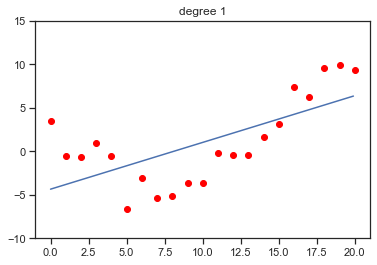

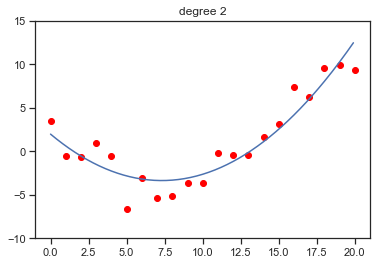

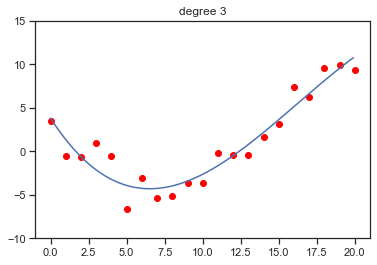

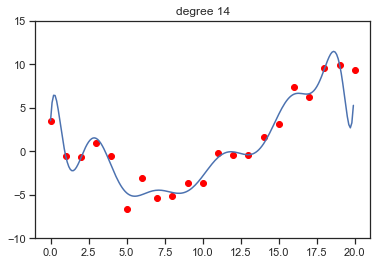

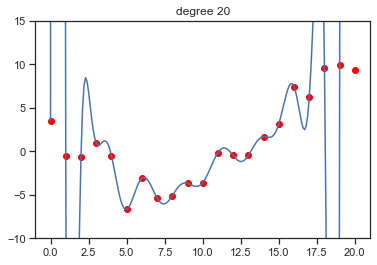

In [10]:
# Plot fitted functions
chosen_degs = [1, 2, 3, 14, 20]
for deg in chosen_degs:
    fig, ax = plt.subplots()
    ax.scatter(xtrain, ytrain, c = 'red')
    ax.plot(xtest, ytest_pred_stored[deg-1])
    ax.set_ylim((-10, 15))
    plt.title('degree {}'.format(deg))
    # save_fig('polyfitDegree{}.pdf'.format(deg))
    plt.show()

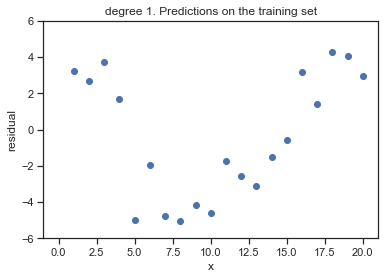

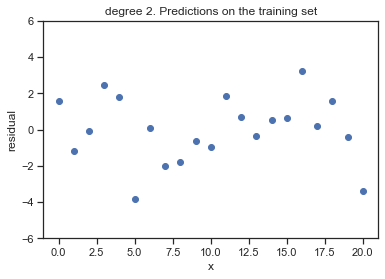

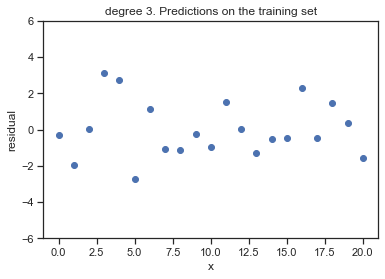

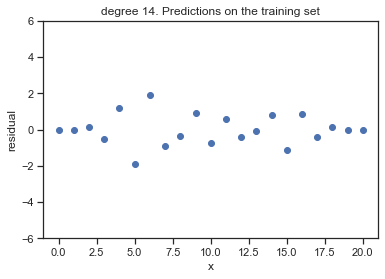

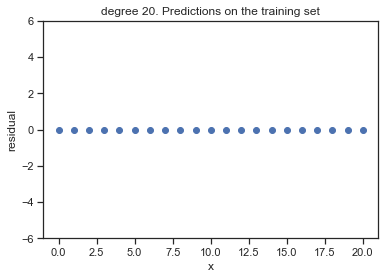

In [11]:
# Plot residuals
for deg in chosen_degs:
    fig, ax = plt.subplots()
    ypred =  ytrain_pred_stored[deg-1]
    residuals = ytrain - ypred
    #ax.plot(ypred, residuals, 'o')
    #ax.set_xlabel('predicted y')
    ax.plot(xtrain, residuals, 'o')
    ax.set_xlabel('x')
    ax.set_ylabel('residual')
    ax.set_ylim(-6,6)
    plt.title('degree {}. Predictions on the training set'.format(deg))
    # save_fig('polyfitDegree{}Residuals.pdf'.format(deg))
    plt.show()

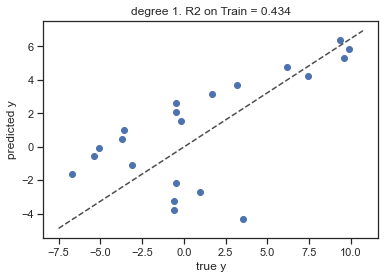

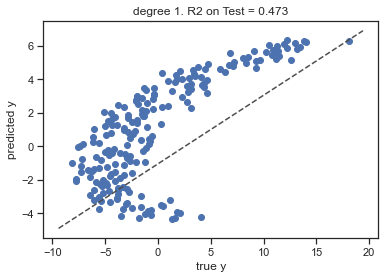

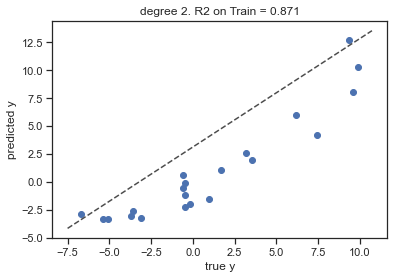

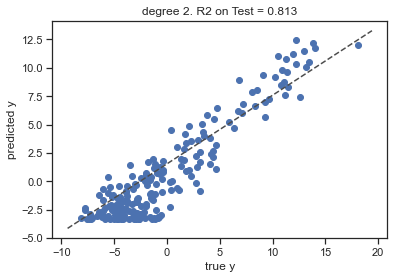

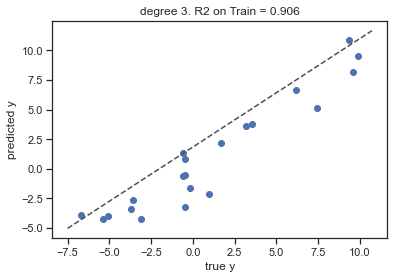

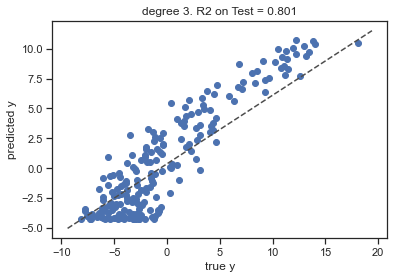

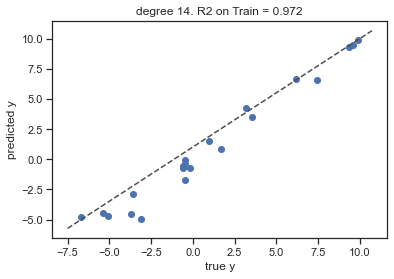

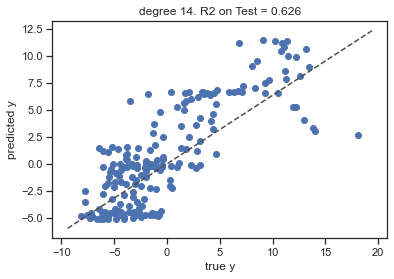

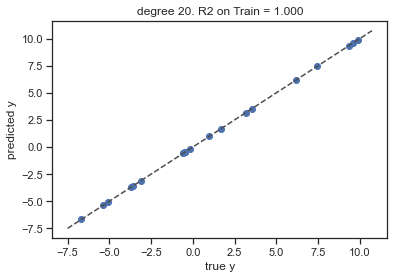

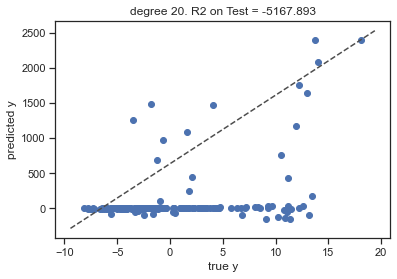

In [12]:
# Plot fit vs actual
for deg in chosen_degs:
    for train in [True, False]:
        if train:
            ytrue = ytrain
            ypred = ytrain_pred_stored[deg-1]
            dataset = 'Train'
        else:
            ytrue = ytest
            ypred = ytest_pred_stored[deg-1]
            dataset = 'Test'
        fig, ax = plt.subplots()
        ax.scatter(ytrue, ypred)
        ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
        ax.set_xlabel('true y')
        ax.set_ylabel('predicted y')
        r2 = sklearn.metrics.r2_score(ytrue, ypred)
        plt.title('degree {}. R2 on {} = {:0.3f}'.format(deg, dataset, r2))
        # save_fig('polyfitDegree{}FitVsActual{}.pdf'.format(deg, dataset))
        plt.show()

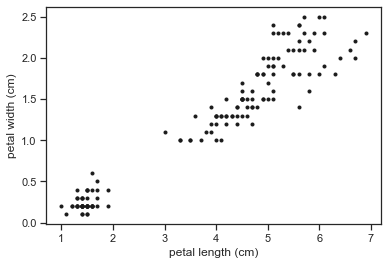

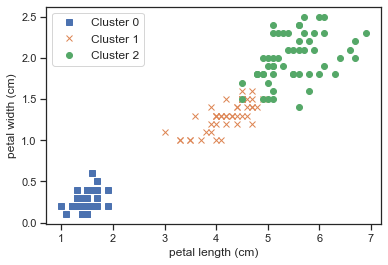

In [13]:
# Figure 1.9
# import numpy as np
# import matplotlib.pyplot as plt
# import os
# figdir = "../figures"
# def save_fig(fname): plt.savefig(os.path.join(figdir, fname))

# import seaborn as sns

from sklearn.datasets import load_iris
#from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

iris = load_iris()
X = iris.data

fig, ax = plt.subplots()
idx1 = 2; idx2 = 3;
ax.scatter(X[:, idx1], X[:, idx2], c="k", marker=".") # c="k" (color is black)
ax.set(xlabel = iris.feature_names[idx1])
ax.set(ylabel = iris.feature_names[idx2])
# save_fig("iris-2d-unlabeled")
plt.show()


K = 3
y_pred = GaussianMixture(n_components=K, random_state=42).fit(X).predict(X)
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

colors = sns.color_palette()[0:K]
markers = ('s', 'x', 'o', '^', 'v')
fig, ax = plt.subplots()
for k in range(0, K): # Does not incldue K (Python style!)
  ax.plot(X[y_pred==k, idx1], X[y_pred==k, idx2], color=colors[k], \
          marker=markers[k], linestyle = 'None', label="Cluster {}".format(k))
ax.set(xlabel = iris.feature_names[idx1])
ax.set(ylabel = iris.feature_names[idx2])
plt.legend(loc="upper left", fontsize=12)
# save_fig("iris-2d-gmm")
plt.show()

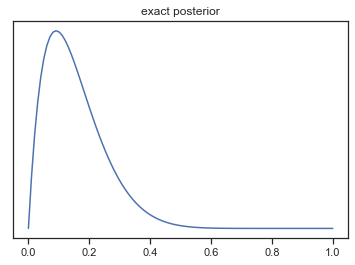

In [16]:
# Figure 7.28

import scipy.stats as stats
#data = np.repeat([0, 1], (10, 3))
data = np.repeat([0, 1], (10, 1))
h = data.sum()
t = len(data) - h

# Exact Posterior
plt.figure()
x = np.linspace(0, 1, 100)
xs = x # grid
# dx_exact = xs[1]-xs[0] # grid width
post_exact = stats.beta.pdf(xs, h+1, t+1) # point-wise beta pdf values
post_exact = post_exact / np.sum(post_exact)
plt.plot(xs, post_exact)
plt.yticks([])
plt.title('exact posterior')
# plt.savefig('../figures/bb_exact.pdf')
plt.show()

In [17]:
# Grid Approximation
def posterior_grid(heads, tails, grid_points=100):
    grid = np.linspace(0, 1, grid_points)
    prior = np.repeat(1/grid_points, grid_points)  # uniform prior
    likelihood = stats.binom.pmf(heads, heads+tails, grid)
    posterior = likelihood * prior
    posterior /= posterior.sum()
    #posterior = posterior * grid_points
    return grid, posterior


n = 20
grid, posterior = posterior_grid(h, t, n) 
# dx_grid = grid[1] - grid[0]
sf = dx_grid / dx_exact # Jacobian scale factor
plt.figure()
#plt.stem(grid, posterior, use_line_collection=True)
plt.bar(grid, posterior, width=1/n, alpha=0.3) # alpha controls darkness of the bars
plt.plot(xs, post_exact*sf)
plt.title('grid approximation')
plt.yticks([])
plt.xlabel('θ');
# plt.savefig('../figures/bb_grid.pdf')
plt.show()

NameError: name 'dx_grid' is not defined